# Notebook to generate a dataframe that captures data reliability

Perform a series of tests/questions on each row and score the result based on 0 (missing), 1 (ambiguous), 2 (present)
- is the plot number recorded? If not, this makes it very difficult to identify the plot as unique vs others (2 if different from 1.2)
- is the type of property recorded? Very difficult to interpret the results if we don’t know this
- does the plot have a zone? (Other means ambiguous)
- does the plot have a zone section?
- does the plot have toilets (sum should not include disused)
- does the plot receive water?
- who is the respondent (2 for landlord, 1 for caretaker and tenant, 0 for unknown)
- was gps info captured?)
- does the number of users sum up to the initial value
- do they know where they dispose of solid wastes?
- do they know if the toilet has been upgraded- no not reliable if they haven’t been there 2 years
- Do they know they age of toilet?
- Do they give age of toilet if more than 1
- Do they know if the toilet has been emptied?
- Do they know how much they spent?
- Do they know how often they empty it?
- Do they give a value for emptying it but have never actually emptied it
- Is the toilet accessible but has never been emptied?
- Is property recorded as not residential but a tenant answering questions
- Toilet is not feasible for emptying but they have

## List of possible inconsistencies that people have mentioned (excluding geospatial which are being dealt with separately
 - visit information
      - length of time of responder on plot - if units is not a number
      - weird time of visit
 - plot types
     - no Record plot number
     - record plot numbers are not equal
     - zone and gps don't correspond
     - number of families on the plot
     - number of people on plot
     - people living on the plot vs toilet users
 - toilet types
    - no toilets

In [2]:
import pandas as pd

In [7]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300
pd.options.display.max_colwidth = 300

In [289]:
data_orig = pd.read_hdf('../data/wsup/tidy/data_tidied.h5', key='main')

In [290]:
name_changes = dict([line.strip().split('\t') for line in open('../data/name_changes.txt')])

In [291]:
data = data_orig.rename(columns=name_changes)

In [292]:
drops = [line.strip() for line in open('../data/drop2.txt')]
drops = data.columns.intersection(drops)
data.drop(drops, 1, inplace=True)

In [293]:
data.shape

(13552, 188)

In [294]:
drops = [d for d in data.columns if not (d.startswith('bool') or d.startswith('cat') or d.startswith('str') or
                                         d.startswith('num') or d.startswith('id') or d.startswith('date'))]
drops
data.drop(drops, 1, inplace=True)

In [295]:
data.head(10).T

Row_index,Row_0001,Row_0002,Row_0003,Row_0004,Row_0005,Row_0006,Row_0007,Row_0008,Row_0009,Row_0010
id_plot,47/33,47\31,47/32,46/109,48/36,4856,47/122,47/104,46/160,NaN
date_visit,2017-03-20 00:00:00,2017-03-20 00:00:00,2017-03-20 00:00:00,2017-03-20 00:00:00,2017-03-20 00:00:00,2017-03-20 00:00:00,NaT,2017-03-20 00:00:00,2017-03-20 00:00:00,2017-03-20 00:00:00
date_visit_time,2017-03-20 08:45:07,2017-03-20 09:01:55,2017-03-20 08:52:26,2017-03-20 09:03:51,2017-03-20 08:55:52,2017-03-20 09:03:47,NaT,2017-03-20 09:17:44,2017-03-20 09:11:37,2017-03-20 09:03:58
cat_property,Residential Plot,Residential Plot,Residential Plot,Residential Plot,Residential Plot,Residential Plot,Residential Plot,Residential Plot,Residential Plot,Residential Plot
cat_property_other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat_zone,ZONE 5,ZONE 5,ZONE 5,ZONE 10,ZONE 11,ZONE 10,ZONE 5,ZONE 5,Other (please specify),ZONE 5
cat_zone_other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nakatindi,NaN
cat_zone_section,A,A,A,NaN,Other (please specify),A,NaN,A,A,A
cat_zone_section_other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
str_zone_name,Sunrise,Salad house,Sunrise,old kanyama,Basala area,Kola,Sunrise,Sunrise,Nakatindi,Mutanda bantu


In [85]:
results = pd.DataFrame(index = data.index)

## Plot id

In [347]:
data[['id_new_plot_id', 'id_plot', 'str_plot_id', 'bool_plot_id']].head()

,id_new_plot_id,id_plot,str_plot_id,bool_plot_id
Row_index,,,,
Row_0001,ID_0000,47/33,47/33,NaN
Row_0002,ID_0001,47\31,47\31,NaN
Row_0003,ID_0002,47/32,47/32,NaN
Row_0004,ID_0003,46/109,46/109,NaN
Row_0005,ID_0004,48/36,48/56,NaN


In [87]:
results['Plot_id'] = data[['id_new_plot_id', 'id_plot', 'str_plot_id']].apply(
    lambda x: 2 if  x[0] != 'None' and x[1]==x[2] else 1 if (x[0]!= 'None') else 0, axis=1)

In [88]:
results['Plot_id'].value_counts()

2    10583
0     1640
1     1329
Name: Plot_id, dtype: int64

In [346]:
data.loc[results.Plot_id == 2, ['id_new_plot_id', 'id_plot', 'str_plot_id']].head()

,id_new_plot_id,id_plot,str_plot_id
Row_index,,,
Row_0001,ID_0000,47/33,47/33
Row_0002,ID_0001,47\31,47\31
Row_0003,ID_0002,47/32,47/32
Row_0004,ID_0003,46/109,46/109
Row_0006,ID_0005,4856,4856


## Property type

In [91]:
p = 'Property_type'
cols = ['cat_property','cat_property_other']

In [96]:
results[p] = data[cols].apply(
    lambda x: 2 if not ('Other' in str(x[0])) or pd.isnull(x[0]) else 1 if pd.notnull(x[1]) else 0, axis=1)

In [97]:
results[p].value_counts()

2    13474
1       73
0        5
Name: Property_type, dtype: int64

In [100]:
data.loc[results[p] == 2, cols]

,cat_property,cat_property_other
Row_index,,
Row_0001,Residential Plot,NaN
Row_0002,Residential Plot,NaN
Row_0003,Residential Plot,NaN
Row_0004,Residential Plot,NaN
Row_0005,Residential Plot,NaN
Row_0006,Residential Plot,NaN
Row_0007,Residential Plot,NaN
Row_0008,Residential Plot,NaN
Row_0009,Residential Plot,NaN


In [102]:
data.loc[results[p] == 2, cols[0]].value_counts()

Residential Plot        13147
Schools                   129
Church                     92
Bar                        69
Market Public Toilet       10
Health Facility             7
Public Toilet               4
Name: cat_property, dtype: int64

## Property zone

In [104]:
p = 'Property_zone'
cols = [ 'cat_zone', 'cat_zone_other', 'cat_zone_section',
       'cat_zone_section_other', 'str_zone_name']

In [105]:
data[cols]

,cat_zone,cat_zone_other,cat_zone_section,cat_zone_section_other,str_zone_name
Row_index,,,,,
Row_0001,ZONE 5,NaN,A,NaN,Sunrise
Row_0002,ZONE 5,NaN,A,NaN,Salad house
Row_0003,ZONE 5,NaN,A,NaN,Sunrise
Row_0004,ZONE 10,NaN,NaN,NaN,old kanyama
Row_0005,ZONE 11,NaN,Other (please specify),NaN,Basala area
Row_0006,ZONE 10,NaN,A,NaN,Kola
Row_0007,ZONE 5,NaN,NaN,NaN,Sunrise
Row_0008,ZONE 5,NaN,A,NaN,Sunrise
Row_0009,Other (please specify),Nakatindi,A,NaN,Nakatindi


In [109]:
results[p] = data[cols].apply(
    lambda x: 2 if not ('Other' in str(x[0])) or pd.isnull(x[0]) else 1 if x.notnull().sum()>1 else 0, axis=1)

In [110]:
results[p].value_counts()

2    9077
1    4464
0      11
Name: Property_zone, dtype: int64

In [111]:
data.loc[results[p] == 0, cols]

,cat_zone,cat_zone_other,cat_zone_section,cat_zone_section_other,str_zone_name
Row_index,,,,,
Row_1937,Other (please specify),NaN,NaN,NaN,NaN
Row_2470,Other (please specify),NaN,NaN,NaN,NaN
Row_2526,Other (please specify),NaN,NaN,NaN,NaN
Row_2566,Other (please specify),NaN,NaN,NaN,NaN
Row_3637,Other (please specify),NaN,NaN,NaN,NaN
Row_3665,Other (please specify),NaN,NaN,NaN,NaN
Row_4158,Other (please specify),NaN,NaN,NaN,NaN
Row_4623,Other (please specify),NaN,NaN,NaN,NaN
Row_7934,Other (please specify),NaN,NaN,NaN,NaN


In [112]:
data.loc[results[p] == 2, cols[0]].value_counts()

ZONE 5     2178
ZONE 14     941
ZONE 12     893
ZONE 13     878
ZONE 22     612
ZONE 11     603
ZONE 10     600
ZONE 21     575
ZONE 29     447
ZONE 7      423
ZONE 23     295
ZONE 6      246
ZONE 24     206
ZONE 28      27
Name: cat_zone, dtype: int64

## Toilets
 - only relevant for residential
 - suspicious if more than 1 toilet per person or no toilets
 - 0 if info unknown

In [296]:
data['num_toilets_per_person'] = data['num_toilets_all'] / data['num_ppl'].map(lambda x: np.NaN if x==0 else x)

In [297]:
p = 'Toilets_total'
cols = [ 'num_toilets_all', 'num_toilets_per_person', 'cat_property']

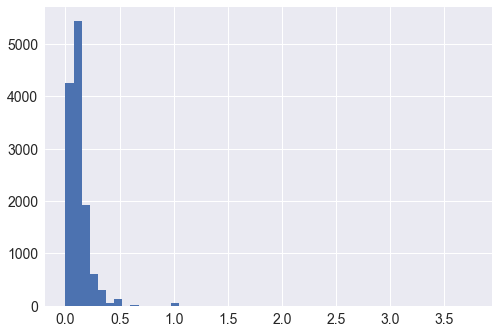

In [298]:
data.loc[data['num_toilets_per_person'].notnull(), 'num_toilets_per_person'].hist(bins=50)

In [299]:
data[cols]

,num_toilets_all,num_toilets_per_person,cat_property
Row_index,,,
Row_0001,1.0,0.040000,Residential Plot
Row_0002,NaN,NaN,Residential Plot
Row_0003,1.0,0.026316,Residential Plot
Row_0004,1.0,0.071429,Residential Plot
Row_0005,1.0,0.083333,Residential Plot
Row_0006,1.0,0.166667,Residential Plot
Row_0007,1.0,0.125000,Residential Plot
Row_0008,1.0,0.052632,Residential Plot
Row_0009,1.0,0.125000,Residential Plot


In [300]:
results[p] = data[cols].apply(
    lambda x: np.NaN if x[2] != 'Residential Plot' else 
    2 if x[0]>0 and x[1]>0 and x[1] <=1 else 
    1 if (x[0]==0) or (x[1]>1) else 
    0, axis=1)

In [301]:
results[p].value_counts()

2.0    12779
0.0      346
1.0       22
Name: Toilets_total, dtype: int64

In [302]:
data.loc[results[p] == 0, cols]

,num_toilets_all,num_toilets_per_person,cat_property
Row_index,,,
Row_0002,NaN,NaN,Residential Plot
Row_0033,1.0,NaN,Residential Plot
Row_0066,NaN,NaN,Residential Plot
Row_0142,1.0,NaN,Residential Plot
Row_0391,NaN,NaN,Residential Plot
Row_0395,1.0,NaN,Residential Plot
Row_0396,NaN,NaN,Residential Plot
Row_0452,NaN,NaN,Residential Plot
Row_0466,NaN,NaN,Residential Plot


In [303]:
data.loc[results[p] == 2, cols[0]].value_counts()

1.0     11380
2.0      1181
3.0       150
4.0        36
5.0        13
11.0        6
6.0         6
7.0         3
10.0        2
15.0        1
12.0        1
Name: num_toilets_all, dtype: int64

## Water

In [119]:
p = 'Water_collection'
cols = [ 'cat_water', 'cat_water_other']

In [128]:
data[cols]

,cat_water,cat_water_other
Row_index,,
Row_0001,Other (please specify),Lusaka water connected tap
Row_0002,Individual connection,NaN
Row_0003,Kiosk,NaN
Row_0004,Kiosk,NaN
Row_0005,Kiosk,NaN
Row_0006,Private,NaN
Row_0007,Other (please specify),Connected by Kenyans water trust
Row_0008,Individual connection,NaN
Row_0009,Kiosk,NaN


In [130]:
results[p] = data[cols].apply(
    lambda x: 2 if 'Other' not in str(x[0]) and pd.notnull(x[0]) else 1 if pd.notnull(x[1]) else 0, axis=1)

In [131]:
results[p].value_counts()

2    13005
1      453
0       94
Name: Water_collection, dtype: int64

In [132]:
data.loc[results[p] == 0, cols]

,cat_water,cat_water_other
Row_index,,
Row_0037,NaN,NaN
Row_0094,Other (please specify),NaN
Row_0101,NaN,NaN
Row_0193,NaN,NaN
Row_0313,NaN,NaN
Row_0329,NaN,NaN
Row_0453,NaN,NaN
Row_0477,NaN,NaN
Row_0557,NaN,NaN


In [133]:
data.loc[results[p] == 2, cols[0]].value_counts()

Kiosk                     8008
Individual connection     2416
Private                   2398
Shallow wells              183
Name: cat_water, dtype: int64

## Respondent

In [146]:
p = 'Respondent_type'
cols = [ 'cat_responder_type']

In [147]:
data[cols]

,cat_responder_type
Row_index,
Row_0001,Landlord
Row_0002,Tenant
Row_0003,Tenant
Row_0004,Landlord
Row_0005,Unknown
Row_0006,Unknown
Row_0007,Landlord
Row_0008,Landlord
Row_0009,Landlord


In [152]:
results[p] = data[cols].apply(
    lambda x: 2 if x[0]=='Landlord' else 1 if x[0] in ['Caretaker', 'Tenant'] else 0, axis=1)

In [153]:
results[p].value_counts()

2    8365
1    4439
0     748
Name: Respondent_type, dtype: int64

In [154]:
data.loc[results[p] == 0, cols]

,cat_responder_type
Row_index,
Row_0005,Unknown
Row_0006,Unknown
Row_0011,Unknown
Row_0014,Unknown
Row_0022,Unknown
Row_0024,Unknown
Row_0030,Unknown
Row_0040,Unknown
Row_0050,Unknown


In [155]:
data.loc[results[p] == 2, cols[0]].value_counts()

Landlord    8365
Name: cat_responder_type, dtype: int64

# GPS information

In [159]:
data.columns

Index(['id_plot', 'date_visit', 'date_visit_time', 'cat_property',
       'cat_property_other', 'cat_zone', 'cat_zone_other', 'cat_zone_section',
       'cat_zone_section_other', 'str_zone_name', 'str_plot_id',
       'bool_plot_id', 'num_hhs', 'num_ppl', 'bool_ppl_known', 'cat_water',
       'cat_water_other', 'str_gps_lat', 'num_c_m', 'num_c_f', 'num_a_m',
       'num_a_f', 'cat_waste', 'cat_waste_other', 'bool_upgrade_2y',
       'bool_upgrade_2y_dn', 'cat_toilet_upgrade_type_3m', 'num_toilet1_age_m',
       'num_toilet1_age_y', 'num_toilet2_age_m', 'num_toilet2_age_y',
       'num_toilet3_age_m', 'num_toilet3_age_y', 'cat_toilet_full',
       'cat_toilet_full_other', 'bool_toilet_emptied', 'cat_toilet_emptied',
       'cat_toilet_emptied_who', 'cat_toilet_emptied_price',
       'cat_toilet_emptied_freq', 'cat_cleanliness', 'cat_roof_other',
       'cat_walls', 'cat_walls_other', 'cat_slab', 'cat_slab_other',
       'cat_interface', 'cat_interact_other', 'cat_containment',
       'c

In [161]:
p = 'GPS_presence'
cols = ['str_gps_lat']

In [162]:
data[cols]

,str_gps_lat
Row_index,
Row_0001,NaN
Row_0002,NaN
Row_0003,-15.431633
Row_0004,-15.430095
Row_0005,-15.429458
Row_0006,NaN
Row_0007,NaN
Row_0008,-15.431480
Row_0009,NaN


In [163]:
results[p] = data[cols].apply(
    lambda x: 2 if pd.notnull(x[0]) else 0, axis=1)

In [164]:
results[p].value_counts()

2    12540
0     1012
Name: GPS_presence, dtype: int64

In [165]:
data.loc[results[p] == 0, cols]

,str_gps_lat
Row_index,
Row_0001,NaN
Row_0002,NaN
Row_0006,NaN
Row_0007,NaN
Row_0009,NaN
Row_0012,NaN
Row_0014,NaN
Row_0017,NaN
Row_0022,NaN


In [166]:
data.loc[results[p] == 2, cols[0]].value_counts()

-15.432335    78
-15.432501    48
-15.432808     6
-15.424808     6
-15.431235     6
-15.427255     6
-15.422852     5
-15.431903     5
-15.423430     5
-15.422363     5
-15.431015     5
-15.436512     5
-15.432577     5
-15.436333     5
-15.425712     5
-15.436158     5
-15.433788     5
-15.435160     5
-15.433923     5
-15.437675     5
-15.435153     5
-15.431150     5
-15.423665     5
-15.423748     5
-15.435548     5
-15.427275     5
-15.429328     5
-15.437757     5
-15.422663     5
-15.432075     4
-15.430518     4
-15.436895     4
-15.434400     4
-15.427787     4
-15.437002     4
-15.427752     4
-15.433943     4
-15.429920     4
-15.431733     4
-15.431135     4
-15.423770     4
-15.426535     4
-15.428363     4
-15.427750     4
-15.426552     4
-15.426507     4
-15.437637     4
-15.434457     4
-15.437415     4
-15.436548     4
-15.424400     4
-15.429332     4
-15.433388     4
-15.432832     4
-15.435287     4
-15.433618     4
-15.433253     4
-15.425803     4
-15.432513    

# Number of users and num of ppl

In [168]:
p = 'People_numbers_consistency'
cols = ['num_ppl', 'num_c_m', 'num_c_f', 'num_a_m',
       'num_a_f']

In [169]:
data[cols]

,num_ppl,num_c_m,num_c_f,num_a_m,num_a_f
Row_index,,,,,
Row_0001,25.0,4.0,13.0,3.0,4.0
Row_0002,22.0,4.0,3.0,8.0,7.0
Row_0003,38.0,10.0,11.0,7.0,10.0
Row_0004,14.0,NaN,6.0,4.0,3.0
Row_0005,12.0,5.0,4.0,4.0,5.0
Row_0006,6.0,2.0,1.0,2.0,1.0
Row_0007,8.0,NaN,4.0,2.0,2.0
Row_0008,19.0,4.0,5.0,6.0,4.0
Row_0009,8.0,1.0,3.0,3.0,5.0


In [170]:
results[p] = data[cols].apply(
    lambda x: 2 if x[1:].sum()==x[0] else 1 if abs(x[1:].sum()-x[0]) < 2 else 0, axis=1)

In [171]:
results[p].value_counts()

2    9771
0    2451
1    1330
Name: People_numbers_consistency, dtype: int64

In [172]:
data.loc[results[p] == 0, cols]

,num_ppl,num_c_m,num_c_f,num_a_m,num_a_f
Row_index,,,,,
Row_0005,12.0,5.0,4.0,4.0,5.0
Row_0009,8.0,1.0,3.0,3.0,5.0
Row_0013,NaN,40.0,80.0,120.0,150.0
Row_0015,50.0,8.0,3.0,13.0,9.0
Row_0020,25.0,4.0,6.0,4.0,16.0
Row_0023,NaN,13.0,16.0,30.0,40.0
Row_0024,13.0,9.0,3.0,7.0,4.0
Row_0030,38.0,4.0,8.0,15.0,13.0
Row_0031,NaN,7.0,9.0,3.0,3.0


In [173]:
data.loc[results[p] == 2, cols[0]].value_counts()

8.0       796
7.0       782
6.0       770
5.0       685
9.0       681
10.0      613
12.0      583
15.0      469
4.0       421
11.0      406
14.0      384
13.0      373
16.0      326
20.0      320
18.0      288
17.0      266
3.0       216
19.0      164
21.0      152
25.0      150
22.0      124
30.0      105
23.0      100
24.0       84
2.0        82
26.0       64
28.0       48
27.0       41
1.0        32
32.0       29
35.0       28
29.0       23
40.0       20
31.0       19
38.0       15
33.0       15
34.0       14
42.0       12
50.0       11
36.0       11
45.0        5
37.0        4
44.0        3
60.0        3
48.0        2
58.0        2
46.0        2
43.0        2
39.0        2
53.0        2
54.0        2
0.0         2
56.0        2
1580.0      1
69.0        1
76.0        1
121.0       1
80.0        1
390.0       1
64.0        1
65.0        1
130.0       1
47.0        1
100.0       1
144.0       1
106.0       1
84.0        1
55.0        1
600.0       1
Name: num_ppl, dtype: int64

## People household - not relevant if not residential

In [304]:
import numpy as np

In [305]:
data['ppl_per_household'] = data['num_ppl'] / data['num_hhs']

In [306]:
p = 'People_household'
cols = ['num_ppl', 'num_hhs', 'cat_property', 'ppl_per_household']

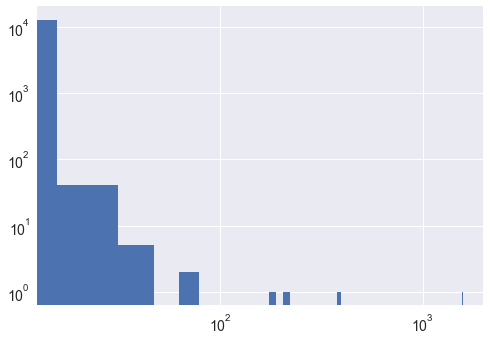

In [307]:
ax = data['ppl_per_household'].hist(bins=100)
ax.set_yscale('log')
ax.set_xscale('log')

In [308]:
data.loc[(data.cat_property == 'Residential Plot') & (data.ppl_per_household > 20),cols]

,num_ppl,num_hhs,cat_property,ppl_per_household
Row_index,,,,
Row_0087,185.0,1.0,Residential Plot,185.000000
Row_0204,91.0,3.0,Residential Plot,30.333333
Row_0759,26.0,1.0,Residential Plot,26.000000
Row_2305,1073.0,5.0,Residential Plot,214.600000
Row_3803,28.0,1.0,Residential Plot,28.000000
Row_4327,21.0,1.0,Residential Plot,21.000000
Row_4601,21.0,1.0,Residential Plot,21.000000
Row_5639,390.0,1.0,Residential Plot,390.000000
Row_5898,1580.0,1.0,Residential Plot,1580.000000


In [309]:
results[p] = data[cols].apply(
    lambda x: np.NaN if x[2] != 'Residential Plot' else 
    2 if x[0] > x[1] and x[3] <=20 else 1 if x.isnull().sum()==0 else 0, axis=1)

In [310]:
data.columns

Index(['id_plot', 'date_visit', 'date_visit_time', 'cat_property',
       'cat_property_other', 'cat_zone', 'cat_zone_other', 'cat_zone_section',
       'cat_zone_section_other', 'str_zone_name', 'str_plot_id',
       'bool_plot_id', 'num_hhs', 'num_ppl', 'bool_ppl_known', 'cat_water',
       'cat_water_other', 'str_gps_lat', 'num_c_m', 'num_c_f', 'num_a_m',
       'num_a_f', 'cat_waste', 'cat_waste_other', 'bool_upgrade_2y',
       'bool_upgrade_2y_dn', 'cat_toilet_upgrade_type_3m', 'num_toilet1_age_m',
       'num_toilet1_age_y', 'num_toilet2_age_m', 'num_toilet2_age_y',
       'num_toilet3_age_m', 'num_toilet3_age_y', 'cat_toilet_full',
       'cat_toilet_full_other', 'bool_toilet_emptied', 'cat_toilet_emptied',
       'cat_toilet_emptied_who', 'cat_toilet_emptied_price',
       'cat_toilet_emptied_freq', 'cat_cleanliness', 'cat_roof_other',
       'cat_walls', 'cat_walls_other', 'cat_slab', 'cat_slab_other',
       'cat_interface', 'cat_interact_other', 'cat_containment',
       'c

In [311]:
data.loc[results[p] == 2, cols]

,num_ppl,num_hhs,cat_property,ppl_per_household
Row_index,,,,
Row_0001,25.0,4.0,Residential Plot,6.250000
Row_0002,22.0,4.0,Residential Plot,5.500000
Row_0003,38.0,13.0,Residential Plot,2.923077
Row_0004,14.0,4.0,Residential Plot,3.500000
Row_0005,12.0,4.0,Residential Plot,3.000000
Row_0007,8.0,2.0,Residential Plot,4.000000
Row_0008,19.0,7.0,Residential Plot,2.714286
Row_0009,8.0,4.0,Residential Plot,2.000000
Row_0010,7.0,3.0,Residential Plot,2.333333


In [312]:
results[p].value_counts()

2.0    12745
0.0      294
1.0      108
Name: People_household, dtype: int64

In [180]:
data.loc[results[p] == 2, cols]

,num_ppl,num_hhs
Row_index,,
Row_0001,25.0,4.0
Row_0002,22.0,4.0
Row_0003,38.0,13.0
Row_0004,14.0,4.0
Row_0005,12.0,4.0
Row_0007,8.0,2.0
Row_0008,19.0,7.0
Row_0009,8.0,4.0
Row_0010,7.0,3.0


## Solid wastes

In [244]:
p = 'Solid waste'
cols = [ 'cat_waste', 'cat_waste_other']

In [245]:
data[cols].head()

,cat_waste,cat_waste_other
Row_index,,
Row_0001,Bin which is collected CBEs,NaN
Row_0002,Bin which is self disposed,NaN
Row_0003,Rubbish Pit,NaN
Row_0004,Rubbish Pit,NaN
Row_0005,Bin which is collected CBEs,NaN


In [246]:
results[p] = data[cols].apply(
    lambda x: 2 if 'Other' not in str(x[0]) and pd.notnull(x[0]) else 1 if pd.notnull(x[1]) else 0, axis=1)

In [247]:
results[p].value_counts()

2    13272
1      196
0       84
Name: Solid waste, dtype: int64

In [250]:
data.loc[results[p] == 0, cols]

,cat_waste,cat_waste_other
Row_index,,
Row_0105,NaN,NaN
Row_0212,"Other (please specify), Bin which is collected CBEs",NaN
Row_0221,NaN,NaN
Row_0243,NaN,NaN
Row_0274,NaN,NaN
Row_0297,"Other (please specify), Rubbish Pit",NaN
Row_0742,NaN,NaN
Row_0863,NaN,NaN
Row_0874,NaN,NaN


In [173]:
data.loc[results[p] == 2, cols[0]].value_counts()

8.0       796
7.0       782
6.0       770
5.0       685
9.0       681
10.0      613
12.0      583
15.0      469
4.0       421
11.0      406
14.0      384
13.0      373
16.0      326
20.0      320
18.0      288
17.0      266
3.0       216
19.0      164
21.0      152
25.0      150
22.0      124
30.0      105
23.0      100
24.0       84
2.0        82
26.0       64
28.0       48
27.0       41
1.0        32
32.0       29
35.0       28
29.0       23
40.0       20
31.0       19
38.0       15
33.0       15
34.0       14
42.0       12
50.0       11
36.0       11
45.0        5
37.0        4
44.0        3
60.0        3
48.0        2
58.0        2
46.0        2
43.0        2
39.0        2
53.0        2
54.0        2
0.0         2
56.0        2
1580.0      1
69.0        1
76.0        1
121.0       1
80.0        1
390.0       1
64.0        1
65.0        1
130.0       1
47.0        1
100.0       1
144.0       1
106.0       1
84.0        1
55.0        1
600.0       1
Name: num_ppl, dtype: int64

# Responder time vs age of toilet

In [313]:
data['num_time_responder']  = np.NaN
for z in ['num_landlord_time','num_caretaker_time', 'num_tenant_time']:
    data['num_time_responder'] = data[['num_time_responder', z]].apply(
        lambda row:row[z] if pd.notnull(row[z]) and pd.isnull(row['num_time_responder']) else row['num_time_responder'], axis=1)

In [314]:
for t in ['1','2', '3']:
    data['num_toilet%s_age' % t] = data['num_toilet%s_age_m' % t].map(
        lambda x:0 if pd.isnull(x) else x+1e-15) +  data['num_toilet%s_age_y' % t].map(
        lambda x:0 if pd.isnull(x) else x+1e-15)*12
    data['num_toilet%s_age' % t] = data['num_toilet%s_age' % t]/12

In [315]:
data[['num_toilet%s_age_y' % t for t in ['1','2', '3']]].head()

,num_toilet1_age_y,num_toilet2_age_y,num_toilet3_age_y
Row_index,,,
Row_0001,3.0,NaN,NaN
Row_0002,NaN,NaN,NaN
Row_0003,2.0,NaN,NaN
Row_0004,5.0,NaN,NaN
Row_0005,15.0,NaN,NaN


In [316]:
p = 'Age_of_toilet_reliability'
cols = ['num_time_responder'] + ['num_toilet%s_age' % t for t in ['1','2', '3']]

In [317]:
data[cols].head()

,num_time_responder,num_toilet1_age,num_toilet2_age,num_toilet3_age
Row_index,,,,
Row_0001,0.083333,3.00,0.0,0.0
Row_0002,0.333333,0.00,0.0,0.0
Row_0003,1.333333,2.00,0.0,0.0
Row_0004,0.416667,5.00,0.0,0.0
Row_0005,NaN,15.25,0.0,0.0


In [318]:
results[p] = data[cols].apply(
    lambda x: 2 if x[0]>x[1:].max() else 1 if x[1:].sum()>0 else 0, axis=1)

In [319]:
results[p].value_counts()

1    12388
2     1142
0       22
Name: Age_of_toilet_reliability, dtype: int64

In [320]:
data.loc[results[p] == 0, cols]

,num_time_responder,num_toilet1_age,num_toilet2_age,num_toilet3_age
Row_index,,,,
Row_0220,NaN,0.0,0.0,0.0
Row_0508,NaN,0.0,0.0,0.0
Row_1286,NaN,0.0,0.0,0.0
Row_2434,NaN,0.0,0.0,0.0
Row_3967,NaN,0.0,0.0,0.0
Row_5044,NaN,0.0,0.0,0.0
Row_5508,NaN,0.0,0.0,0.0
Row_8519,NaN,0.0,0.0,0.0
Row_9463,NaN,0.0,0.0,0.0


In [276]:
data.loc[results[p] == 2, cols[0]].value_counts()

0.083333      77
0.166667      76
0.416667      67
0.250000      67
0.333333      50
0.500000      48
0.666667      44
1.250000      43
1.416667      40
0.583333      38
0.833333      37
1.666667      35
2.083333      34
2.500000      30
3.333333      30
0.750000      29
4.166667      27
1.000000      24
1.750000      20
1.833333      20
1.333333      19
1.083333      19
1.500000      18
1.166667      16
1.583333      15
2.250000      15
3.750000      15
0.916667      14
1.916667      12
4.000000      11
2.166667       9
3.166667       9
2.916667       8
3.250000       8
2.833333       7
2.416667       7
2.333333       7
3.000000       7
3.416667       6
3.916667       6
3.500000       6
4.666667       5
3.833333       5
2.666667       5
5.000000       5
2.750000       5
2.000000       5
2.583333       4
3.083333       4
4.416667       3
4.333333       3
4.833333       3
4.750000       3
4.083333       3
4.250000       2
5.833333       2
3.583333       1
6.666667       1
3.666667      

# Toilet details vs number of toilets

 - not compete

In [321]:
p = 'Toilet_details'
cols = [ 'num_toilets_all', 'bool_upgrade_2y',
       'bool_upgrade_2y_dn', 'cat_toilet_upgrade_type_3m','cat_toilet_full',
       'cat_toilet_full_other', 'bool_toilet_emptied', 'cat_toilet_emptied',
       'cat_toilet_emptied_who', 'cat_toilet_emptied_price',
       'cat_toilet_emptied_freq', 'cat_cleanliness', 'cat_roof_other',
       'cat_walls', 'cat_walls_other', 'cat_slab', 'cat_slab_other',
       'cat_interface', 'cat_interact_other', 'cat_containment',
       'cat_containment_other', 'cat_condition_roof', 'cat_condition_wall',
       'cat_condition_floor', 'cat_condition_interface',
       'cat_condition_containmenet', 'bool_sludge', 'cat_emptying_feasible',
       'cat_emptying_feasible_dn', 'cat_handwashing', 'cat_overflow',
       'bool_vacuum', 'bool_light', 'bool_pushcart', 'bool_disability',
       'bool_children', 'bool_wan']

In [322]:
data.loc[data.num_toilets_all.isin([np.NaN, 0]), cols].head()

,num_toilets_all,bool_upgrade_2y,bool_upgrade_2y_dn,cat_toilet_upgrade_type_3m,num_toilet1_age_m,num_toilet1_age_y,num_toilet2_age_m,num_toilet2_age_y,num_toilet3_age_m,num_toilet3_age_y,cat_toilet_full,cat_toilet_full_other,bool_toilet_emptied,cat_toilet_emptied,cat_toilet_emptied_who,cat_toilet_emptied_price,cat_toilet_emptied_freq,cat_cleanliness,cat_roof_other,cat_walls,cat_walls_other,cat_slab,cat_slab_other,cat_interface,cat_interact_other,cat_containment,cat_containment_other,cat_condition_roof,cat_condition_wall,cat_condition_floor,cat_condition_interface,cat_condition_containmenet,bool_sludge,cat_emptying_feasible,cat_emptying_feasible_dn,cat_handwashing,cat_overflow,bool_vacuum,bool_light,bool_pushcart,bool_disability,bool_children,bool_wan
Row_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Row_0002,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Row_0066,NaN,Yes,NaN,6,NaN,10.0,NaN,NaN,NaN,NaN,2,NaN,Yes,5,3,450.0,Other (please specify),5,NaN,2,NaN,1,NaN,4,NaN,Pit latrine,NaN,1.0,2.0,2.0,2.0,1.0,Yes,No,NaN,No,No,NaN,NaN,1.0,1.0,1.0,1.0
Row_0391,NaN,NaN,1.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,"Other (please specify), 1",NaN,No,NaN,NaN,NaN,NaN,Other (please specify),It collapsed,Other (please specify),It collapsed,Other (please specify),Collapsed,6,NaN,Other (please specify),Collapsed,1.0,1.0,1.0,1.0,1.0,No,No,NaN,No,No,1.0,1.0,1.0,NaN,1.0,1.0
Row_0396,NaN,No,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,7,NaN,2,NaN,4,NaN,Pit latrine,NaN,1.0,1.0,2.0,2.0,2.0,No,No,NaN,No,Yes,1.0,1.0,1.0,NaN,NaN,NaN
Row_0452,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,No,NaN,NaN,NaN,NaN,5,NaN,"10, 6",NaN,2,NaN,4,NaN,Pit latrine,NaN,1.0,1.0,1.0,1.0,1.0,Yes,No,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN


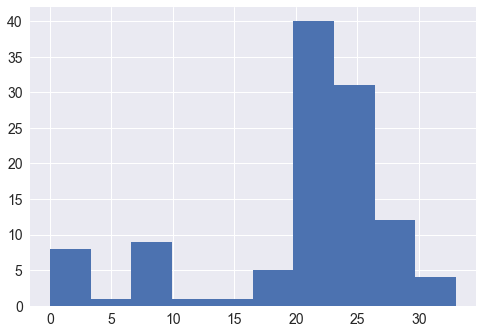

In [325]:
data.loc[data.num_toilets_all.isin([np.NaN, 0]), cols].notnull().sum(axis=1).hist()

In [339]:
results[p] = data[cols].apply(
    lambda x: 2 if (x[0] not in [np.NaN, 0]) and (x[1:].notnull().sum() > 20) else 
    1 if (x[0] in [np.NaN, 0]) and (x[1:].notnull().sum() > 30) or (x[0] not in [np.NaN, 0])
    else 0, axis=1)

In [340]:
results[p].value_counts()

2    12706
1      841
0        5
Name: Toilet_details, dtype: int64

In [336]:
data.num_toilets_all.isnull().sum()


105

In [332]:
data.loc[results[p] == 0, cols]

,num_toilets_all,bool_upgrade_2y,bool_upgrade_2y_dn,cat_toilet_upgrade_type_3m,num_toilet1_age_m,num_toilet1_age_y,num_toilet2_age_m,num_toilet2_age_y,num_toilet3_age_m,num_toilet3_age_y,cat_toilet_full,cat_toilet_full_other,bool_toilet_emptied,cat_toilet_emptied,cat_toilet_emptied_who,cat_toilet_emptied_price,cat_toilet_emptied_freq,cat_cleanliness,cat_roof_other,cat_walls,cat_walls_other,cat_slab,cat_slab_other,cat_interface,cat_interact_other,cat_containment,cat_containment_other,cat_condition_roof,cat_condition_wall,cat_condition_floor,cat_condition_interface,cat_condition_containmenet,bool_sludge,cat_emptying_feasible,cat_emptying_feasible_dn,cat_handwashing,cat_overflow,bool_vacuum,bool_light,bool_pushcart,bool_disability,bool_children,bool_wan
Row_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Row_0002,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Row_0100,1.0,No,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,Yes,No,1.0,1.0,1.0,1.0,1.0,1.0
Row_0671,1.0,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,"1, 3",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,No,NaN,0.0,0.0,1.0,1.0,1.0,1.0
Row_0811,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,Pit latrine,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,No,NaN,NaN,1.0,NaN,NaN,1.0
Row_1012,2.0,No,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,No,1.0,1.0,1.0,1.0,1.0,1.0
Row_1091,NaN,No,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,1,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pit latrine,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,1.0,No,No,1.0,1.0,1.0,1.0,1.0,1.0
Row_1559,2.0,No,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,No,1.0,1.0,1.0,NaN,1.0,1.0
Row_1654,2.0,NaN,1.0,NaN,NaN,15.0,NaN,NaN,NaN,NaN,Other (please specify),Never been full,No,NaN,NaN,NaN,NaN,1,NaN,2,NaN,1,NaN,NaN,NaN,Pit latrine,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,No,NaN,NaN,NaN,NaN,1.0,1.0
Row_2079,1.0,No,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,2,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,No,No,NaN,NaN,1.0,0.0,NaN,NaN


In [173]:
data.loc[results[p] == 2, cols[0]].value_counts()

8.0       796
7.0       782
6.0       770
5.0       685
9.0       681
10.0      613
12.0      583
15.0      469
4.0       421
11.0      406
14.0      384
13.0      373
16.0      326
20.0      320
18.0      288
17.0      266
3.0       216
19.0      164
21.0      152
25.0      150
22.0      124
30.0      105
23.0      100
24.0       84
2.0        82
26.0       64
28.0       48
27.0       41
1.0        32
32.0       29
35.0       28
29.0       23
40.0       20
31.0       19
38.0       15
33.0       15
34.0       14
42.0       12
50.0       11
36.0       11
45.0        5
37.0        4
44.0        3
60.0        3
48.0        2
58.0        2
46.0        2
43.0        2
39.0        2
53.0        2
54.0        2
0.0         2
56.0        2
1580.0      1
69.0        1
76.0        1
121.0       1
80.0        1
390.0       1
64.0        1
65.0        1
130.0       1
47.0        1
100.0       1
144.0       1
106.0       1
84.0        1
55.0        1
600.0       1
Name: num_ppl, dtype: int64

Not yet finished
 - do they know if the toilet has been upgraded- no not reliable if they haven’t been there 2 years
- Do they know they age of toilet?
- Do they give age of toilet if more than 1
- Do they know if the toilet has been emptied?
- Do they know how much they spent?
- Do they know how often they empty it?
- Do they give a value for emptying it but have never actually emptied it
- Is the toilet accessible but has never been emptied?
- Is property recorded as not residential but a tenant answering questions
- Toilet is not feasible for emptying but they have
 - is the row very similar to any other

In [241]:
data.columns

Index(['id_plot', 'date_visit', 'date_visit_time', 'cat_property',
       'cat_property_other', 'cat_zone', 'cat_zone_other', 'cat_zone_section',
       'cat_zone_section_other', 'str_zone_name', 'str_plot_id',
       'bool_plot_id', 'num_hhs', 'num_ppl', 'bool_ppl_known', 'cat_water',
       'cat_water_other', 'str_gps_lat', 'num_c_m', 'num_c_f', 'num_a_m',
       'num_a_f', 'cat_waste', 'cat_waste_other', 'bool_upgrade_2y',
       'bool_upgrade_2y_dn', 'cat_toilet_upgrade_type_3m', 'num_toilet1_age_m',
       'num_toilet1_age_y', 'num_toilet2_age_m', 'num_toilet2_age_y',
       'num_toilet3_age_m', 'num_toilet3_age_y', 'cat_toilet_full',
       'cat_toilet_full_other', 'bool_toilet_emptied', 'cat_toilet_emptied',
       'cat_toilet_emptied_who', 'cat_toilet_emptied_price',
       'cat_toilet_emptied_freq', 'cat_cleanliness', 'cat_roof_other',
       'cat_walls', 'cat_walls_other', 'cat_slab', 'cat_slab_other',
       'cat_interface', 'cat_interact_other', 'cat_containment',
       'c

In [348]:
results.to_hdf('../data/wsup/tidy/data_tidied.h5', key='resuts')

# Summary results

### Proportion of fields with glowing results

In [341]:
results[results.mean(axis=1)==2].shape[0] / results.shape[0]

0.018004722550177096

### Spread of average scores

In [342]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.4)

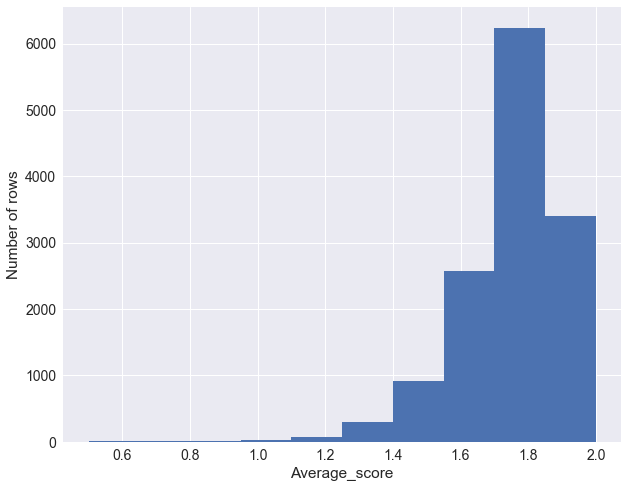

In [343]:
g = results.mean(axis=1).hist(figsize=(10,8))
g.set_xlabel('Average_score')
g.set_ylabel('Number of rows')

# Scores by field

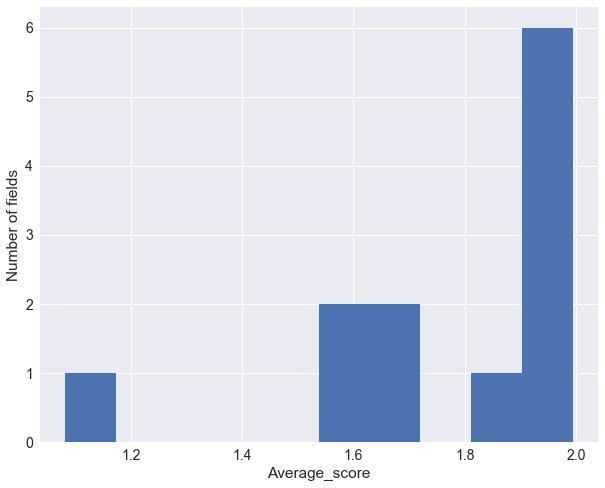

In [344]:
g = results.mean(axis=0).hist(figsize=(10,8))
g.set_xlabel('Average_score')
g.set_ylabel('Number of fields')

In [345]:
results.mean(axis=0).sort_values(ascending=False)

Property_type                 1.993875
Solid waste                   1.973140
Water_collection              1.952701
People_household              1.947060
Toilets_total                 1.945691
Toilet_details                1.937205
GPS_presence                  1.850649
Property_zone                 1.668979
Plot_id                       1.659903
Respondent_type               1.562057
People_numbers_consistency    1.540142
Age_of_toilet_reliability     1.082645
dtype: float64